In [1]:
from regression import *
from zkrp import *
import numpy as np
import pandas as pd
from code_zq.comparison import *
from tqdm import tqdm

In [2]:
def trans_data(l):
    res = []
    for i in l:
        if type(i) != tuple:
            res.append(i)
        else:
            for ii in i:
                res.append(ii)
    return res


def data_comparasion(x, y, x_test, y_test):
    x = x
    y = y
    x_test = x_test
    y_test = y_test
    ntrain = x.shape[0]
    ntest = x_test.shape[0]
    res = []
    evallist = ['RMSE', 'NHD', 'IOR', 'DC']

    x_l = x[:,0].reshape((ntrain,1))
    x_u = x[:,1].reshape((ntrain,1))
    x_c = x_u/2 + x_l/2
    x_r = x_u/2 - x_l/2
    y_l = y[:,0].reshape((ntrain,1))
    y_u = y[:,1].reshape((ntrain,1))
    y_c = y_u/2 + y_l/2
    y_r = y_u/2 - y_l/2
    y_c_test = y_test[:,1].reshape((ntest,1))/2 + y_test[:,0].reshape((ntest,1))/2
    y_r_test = y_test[:,1].reshape((ntest,1))/2 - y_test[:,0].reshape((ntest,1))/2
    x_c_test = x_test[:,1].reshape((ntest,1))/2 + x_test[:,0].reshape((ntest,1))/2
    x_r_test = x_test[:,1].reshape((ntest,1))/2 - x_test[:,0].reshape((ntest,1))/2

    ### HF_Med-Method
    a_c_hathfmed, b_c_hathfmed, a_r_hathfmed, b_r_hathfmed = HF_Med_Method(x, y)

    yhat_c_HFmed = a_c_hathfmed * x_c_test + b_c_hathfmed
    yhat_r_HFmed = a_r_hathfmed * x_r_test + b_r_hathfmed
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### HF_Qd-Method
    a_c_hatqd, b_c_hatqd, a_r_hatqd, b_r_hatqd = HF_Qd_Method(x, y)

    yhat_c_HFqd = a_c_hatqd * x_c_test + b_c_hatqd
    yhat_r_HFqd = a_r_hatqd * x_r_test + b_r_hatqd
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### Med-Method
    a_c_hatmed, b_c_hatmed, a_r_hatmed, b_r_hatmed = Medreg_Method(x, y)

    yhat_c_med = a_c_hatmed * x_c_test + b_c_hatmed
    yhat_r_med = a_r_hatmed * x_r_test + b_r_hatmed
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

   ### HF1-Method
    a_c_hat1, b_c_hat1, a_r_hat1, b_r_hat1 = HF_Method1(x,y)
    # print("done hf1")

    yhat_c_HF1 = a_c_hat1 * x_c_test + b_c_hat1
    yhat_r_HF1 = a_r_hat1 * x_r_test + b_r_hat1
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### HF2-Method
    a_c_hat2, b_c_hat2, a_r_hat2, b_r_hat2 = HF_Method2(x,y)
    # print("done hf2")

    yhat_c_HF2 = a_c_hat2 * x_c_test + b_c_hat2
    yhat_r_HF2 = a_r_hat2 * x_r_test + b_r_hat2
    # yhat_c_HF = a_c_hat * x_c + b_c_hat
    # yhat_r_HF = a_r_hat * x_r + b_r_hat

    ### CM_Method
    hatBeta_CM = CM_Method(x_c, y_c)
    # print("done cm")

    yhat_c_CM = predict(x_c_test, hatBeta_CM)
    yhat_r_CM = predict(x_r_test, hatBeta_CM)

    ### CRM_Method
    hatBeta_c_CRM, hatBeta_r_CRM = CRM_Method(x_c, y_c, x_r, y_r)
    # print("done crm")

    yhat_c_CRM = predict(x_c_test, hatBeta_c_CRM)
    yhat_r_CRM = predict(x_r_test, hatBeta_r_CRM)

    ### CCRM_Method
    hatBeta_c_CCRM, hatBeta_r_CCRM = CCRM_Method(x_c, y_c, x_r, y_r)
    # print("done ccrm")

    yhat_c_CCRM = predict(x_c_test, hatBeta_c_CCRM)
    yhat_r_CCRM = predict(x_r_test, hatBeta_r_CCRM)

    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HFmed, yhat_r_HFmed, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HFqd, yhat_r_HFqd, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_med, yhat_r_med, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HF1, yhat_r_HF1, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_HF2, yhat_r_HF2, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CM, yhat_r_CM, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CRM, yhat_r_CRM, method=i, detail=True) for i in evallist]))
    res.append(trans_data([eval(y_c_test, y_r_test, yhat_c_CCRM, yhat_r_CCRM, method=i, detail=True) for i in evallist]))
    return res

### CCRM 数据实验部分

In [3]:
def trans_to_datakxl(train, test):
    xtrain = np.array(train).T[:,0:2]
    ytrain = np.array(train).T[:,2:4]
    xtest = np.array(test).T[:,0:2]
    ytest = np.array(test).T[:,2:4]
    train_x = np.vstack((xtrain[:,0]-xtrain[:,1], xtrain[:,0]+xtrain[:,1])).T
    train_y = np.vstack((ytrain[:,0]-ytrain[:,1], ytrain[:,0]+ytrain[:,1])).T
    test_x = np.vstack((xtest[:,0]-xtest[:,1], xtest[:,0]+xtest[:,1])).T
    test_y = np.vstack((ytest[:,0]-ytest[:,1], ytest[:,0]+ytest[:,1])).T
    return train_x, train_y, test_x, test_y


def comparison2(a,b,c,d,e,f,g,h,i,j, path, mess=False):
    eval_HFmed = []
    eval_HFqd = []
    eval_med = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []

    for iter in tqdm(range(50)):
        if mess:
            train, test, beta0, beta1, betastar = data_generation2(375, a, b, c, d, e, f, g, h, i, j, iter)
        else:
            train, test, beta0, beta1, betastar = data_generation(375, a, b, c, d, e, f, g, h, i, j, iter)
        x, y, x_test, y_test = trans_to_datakxl(train, test)

        result = data_comparasion(x, y, x_test, y_test)
        eval_HFmed.append(result[0])
        eval_HFqd.append(result[1])
        eval_med.append(result[2])
        eval_HF1.append(result[3])
        eval_HF2.append(result[4])
        eval_CM.append(result[5])
        eval_CRM.append(result[6])
        eval_CCRM.append(result[7])

    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HFqd = [np.mean(np.array(eval_HFqd),axis=0), np.var(np.array(eval_HFqd),axis=0)]
    EV_med = [np.mean(np.array(eval_med),axis=0), np.var(np.array(eval_med),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HFqd[0][i], EV_HFqd[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_med[0][i], EV_med[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HFmed', 'HFqd', 'Med', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)


def plot_CCRM_data(a,b,c,d,e,f,g,h,i,j,mess=False):
    if mess:
        train, test, beta0, beta1, betastar = data_generation2(375, a, b, c, d, e, f, g, h, i, j, 0)
    else:
        train, test, beta0, beta1, betastar = data_generation(375, a, b, c, d, e, f, g, h, i, j, 0)
    x, y, x_test, y_test = trans_to_datakxl(train, test)
    show3(x,y,varname=["x", "y"])

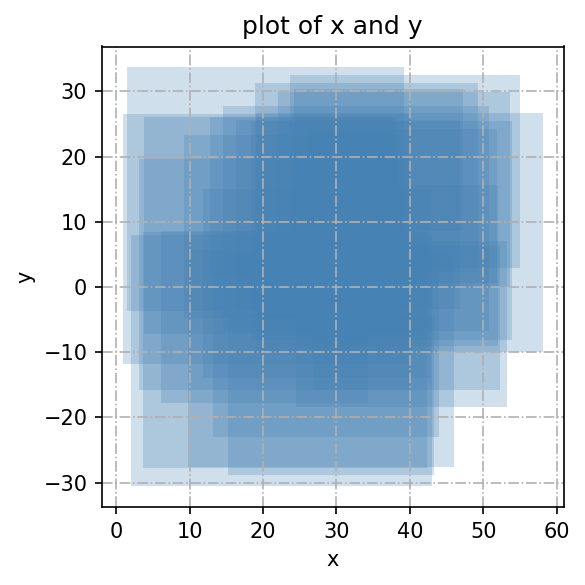

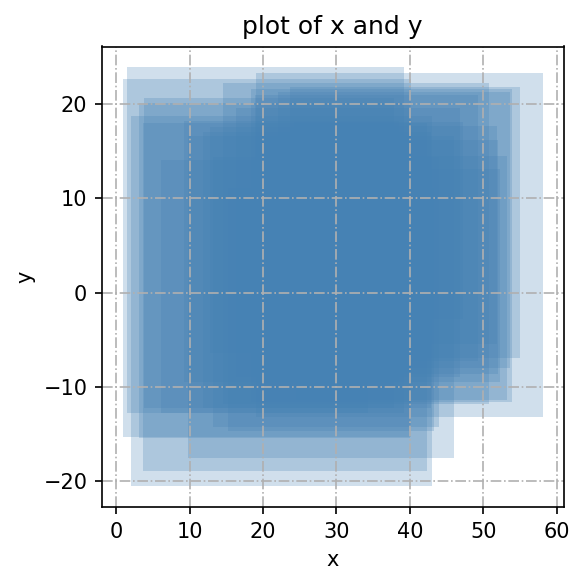

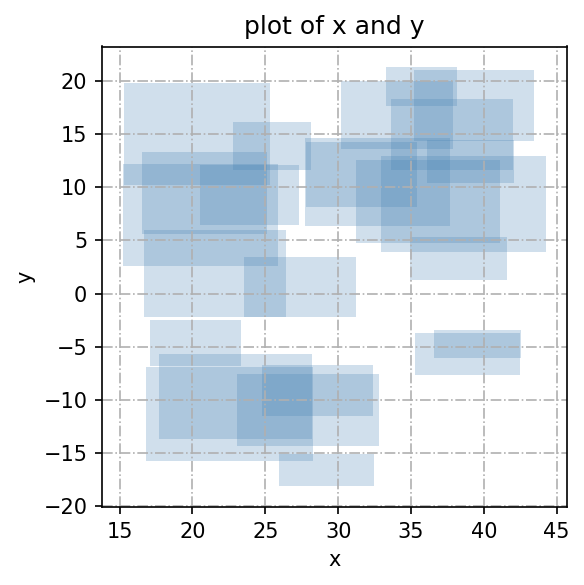

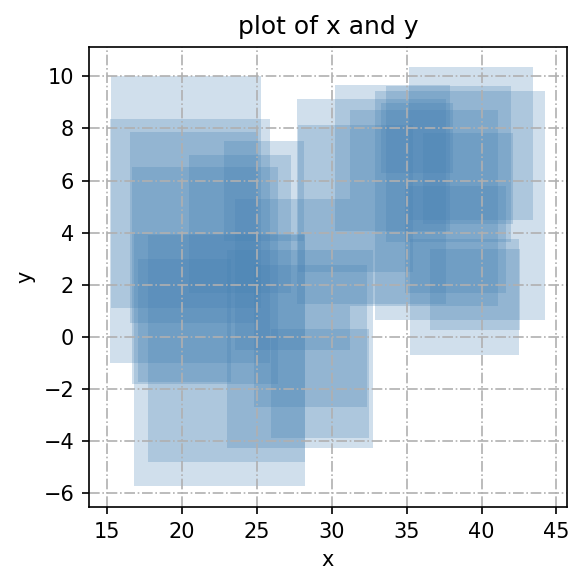

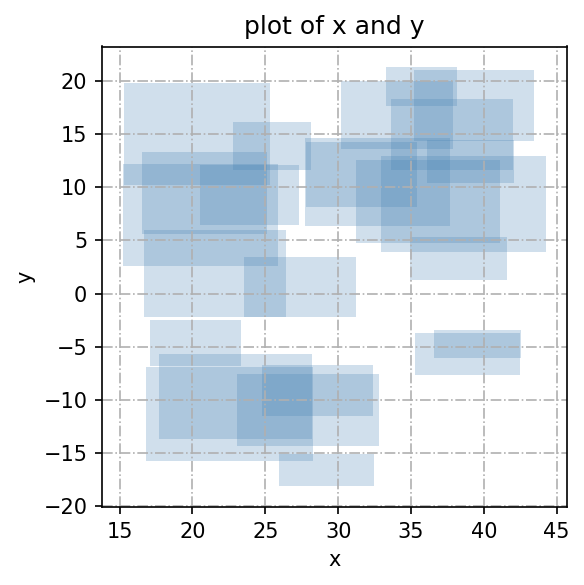

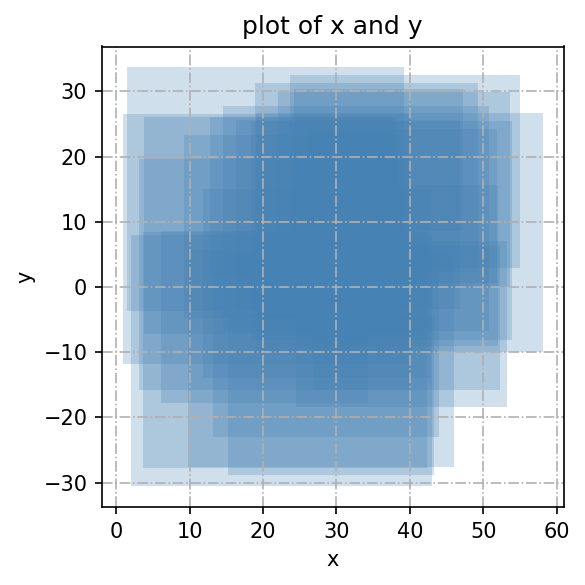

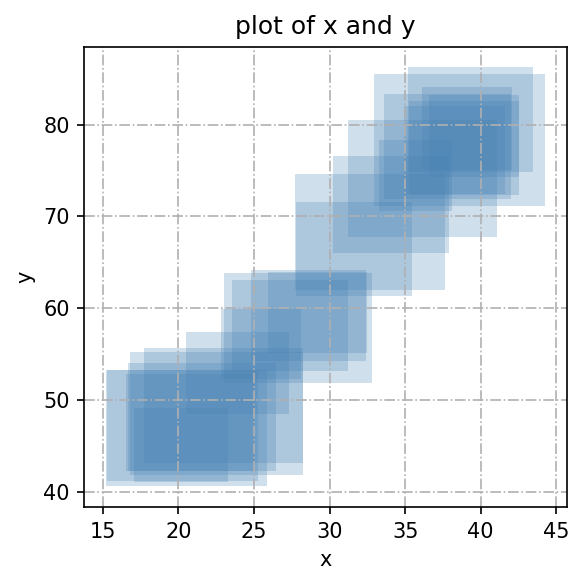

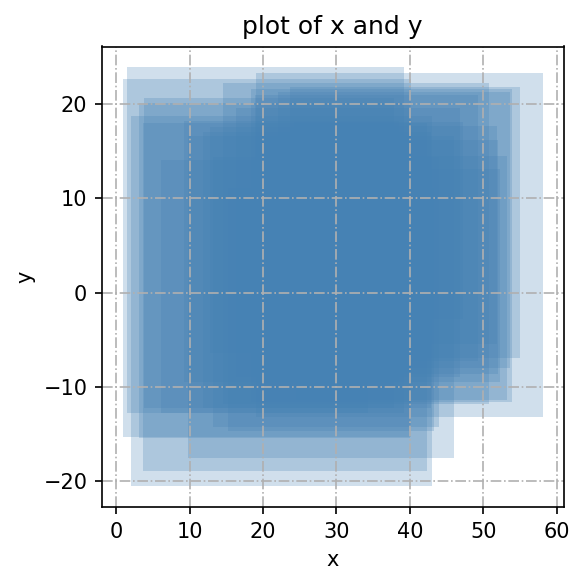

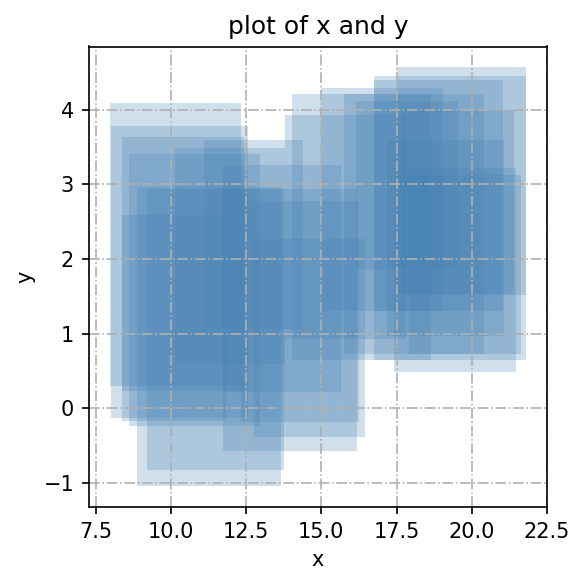

In [4]:
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20)
plot_CCRM_data(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20)
plot_CCRM_data(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2)

In [4]:
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/CCRM1.csv')
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/CCRM2.csv')
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/CCRM3.csv')
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, path='data/reg_result/CCRM4.csv')
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/CCRM5.csv')
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/CCRM6.csv')
comparison2(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, path='data/reg_result/CCRM7.csv')
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/CCRM8.csv')
comparison2(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, path='data/reg_result/CCRM9.csv')

100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


### 非均匀分布数据模拟部分

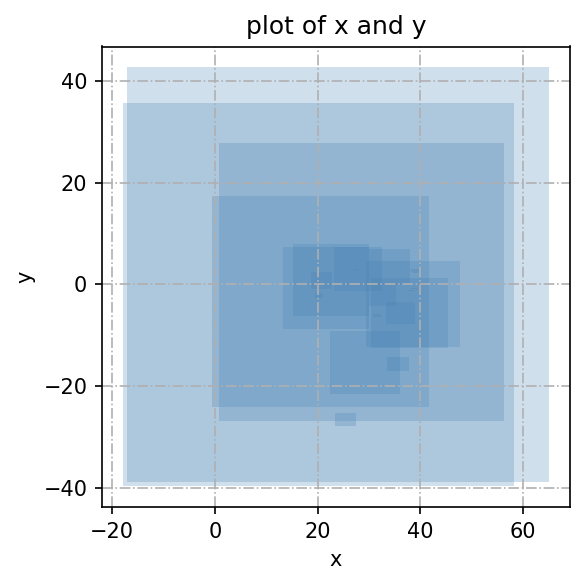

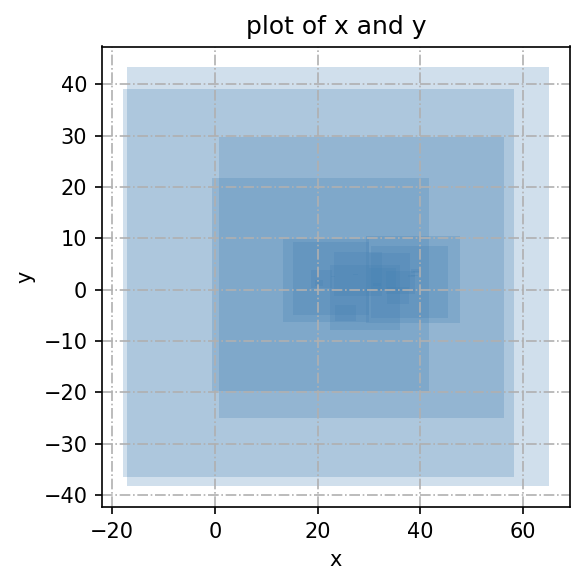

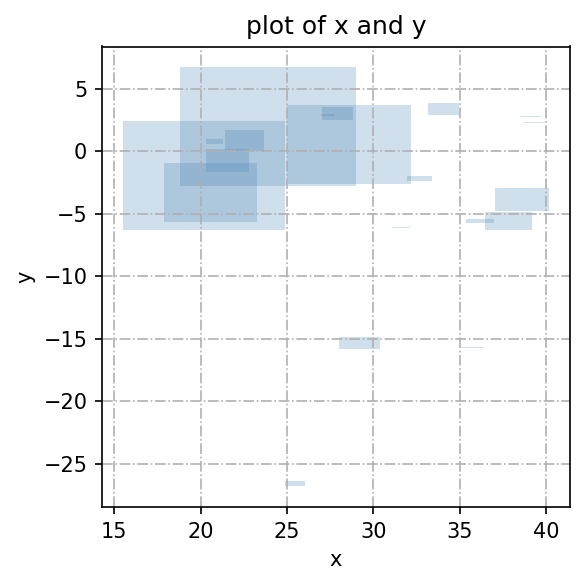

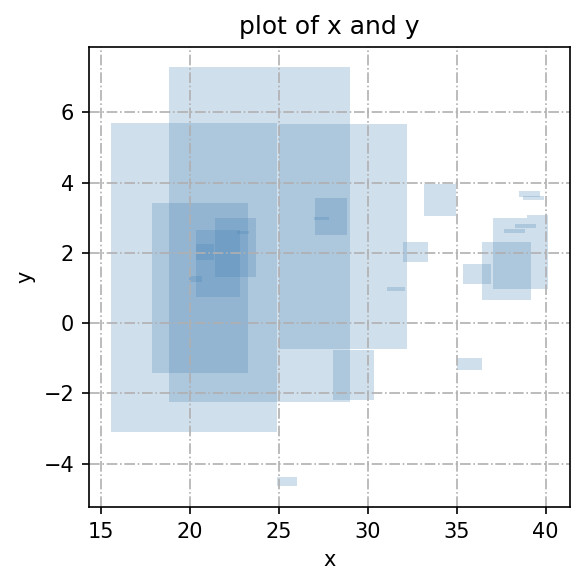

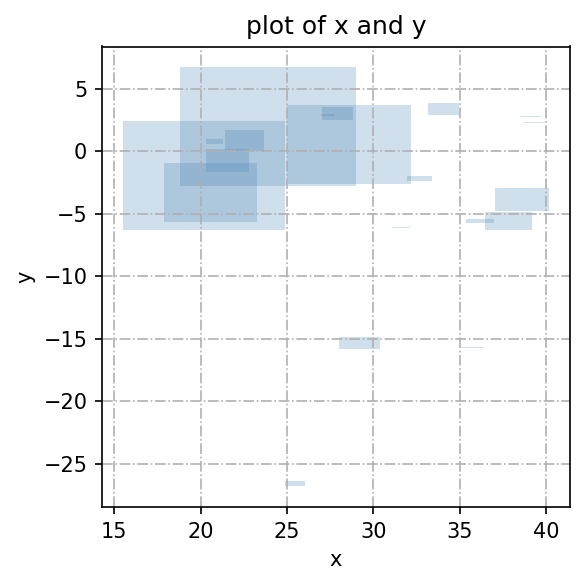

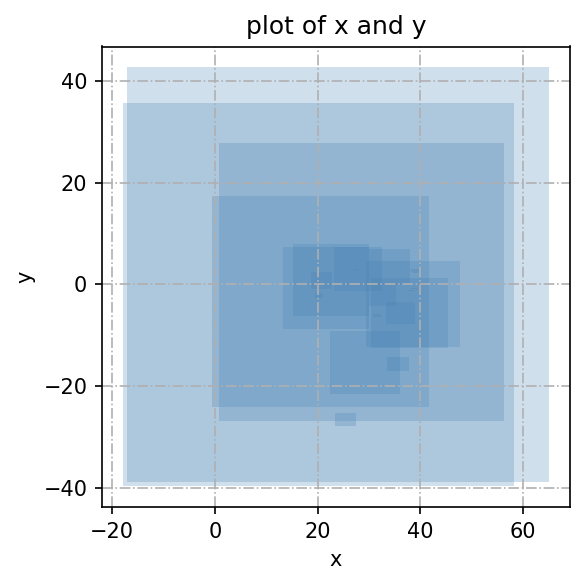

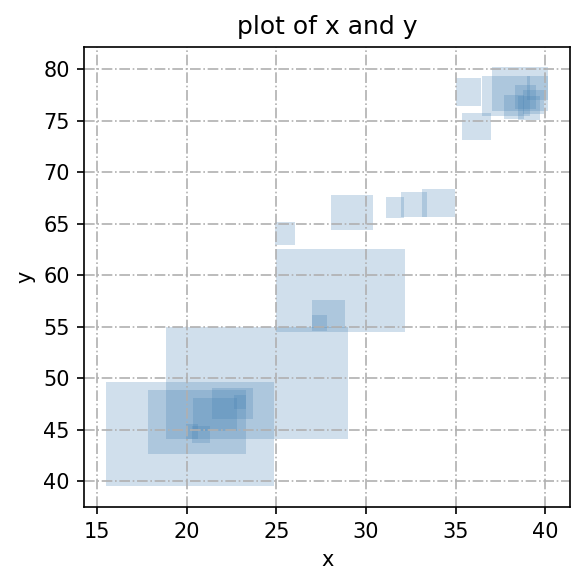

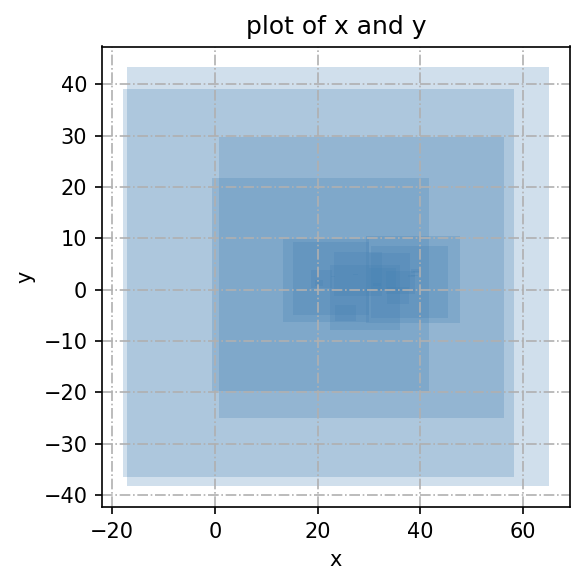

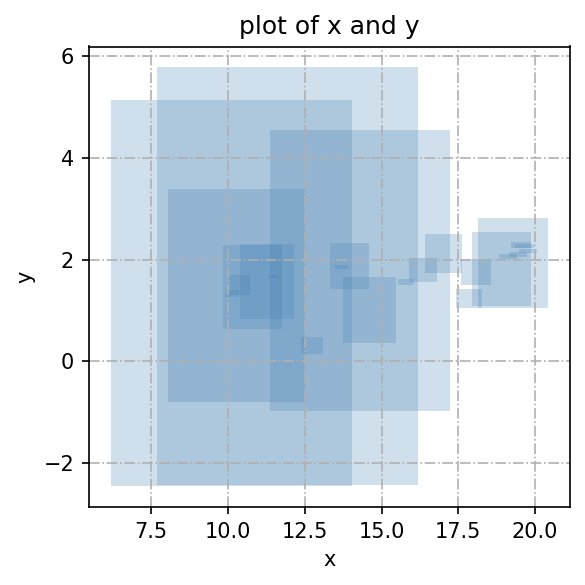

In [4]:
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, mess=True)
plot_CCRM_data(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, mess=True)
plot_CCRM_data(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, mess=True)

In [5]:
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM1.csv', mess=True)
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM2.csv', mess=True)
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM3.csv', mess=True)
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM4.csv', mess=True)
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM5.csv', mess=True)
comparison2(20, 40, 0, 1, -20, 20, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM6.csv', mess=True)
comparison2(20, 40, 1, 10, 1, 5, 0, 0.05, 1, 5, path='data/reg_result/mess_CCRM7.csv', mess=True)
comparison2(20, 40, 0, 1, -5, 5, 0, 0.05, 10, 20, path='data/reg_result/mess_CCRM8.csv', mess=True)
comparison2(10, 20, 0, 1, -1, 1, 0, 0.05, 1, 2, path='data/reg_result/mess_CCRM9.csv', mess=True)

100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


### 非线性特例数据部分

In [52]:
np.random.seed(0)
n = 100

centralx = np.linspace(1,5,n)
centraly = np.linspace(5,1,n)
centralz = np.random.normal(3, 1, n)
centralw = np.square(centralx)
centrals = np.sin(np.linspace(0,2* np.pi, n))
centralss = np.sin(np.linspace(0,2* np.pi, n) + np.pi/4)
centralsss = np.cos(np.linspace(0,2* np.pi, n) + np.pi/4)
centralc = np.cos(np.linspace(0,2* np.pi, n))
centralr = np.append(np.sqrt(25 - pow(np.linspace(1,5,n//2), 2))[::-1], np.sqrt(25 - pow(np.linspace(1,5,n//2), 2)))

mydatax = np.zeros((n, 2))
interval_lenx = abs(np.random.normal(0, 1, n))
mydatax[:, 0] = centralx - interval_lenx / 2
mydatax[:, 1] = centralx + interval_lenx / 2

### 区间长度反向
mydataxx = np.zeros((n, 2))
interval_lenxx = interval_lenx[::-1]
mydataxx[:, 0] = centralx - interval_lenxx / 2
mydataxx[:, 1] = centralx + interval_lenxx / 2

### 区间长度正排序
mydataxxx = np.zeros((n, 2))
interval_lenxxx = np.sort(interval_lenx)
mydataxxx[:, 0] = centralx - interval_lenxxx / 2
mydataxxx[:, 1] = centralx + interval_lenxxx / 2

### 区间长度逆排序
mydataxxxx = np.zeros((n, 2))
interval_lenxxxx = np.sort(interval_lenx)[::-1]
mydataxxxx[:, 0] = centralx - interval_lenxxxx / 2
mydataxxxx[:, 1] = centralx + interval_lenxxxx / 2

mydatay = np.zeros((n, 2))
interval_leny = abs(np.random.normal(0, 1, n))
mydatay[:, 0] = centraly - interval_lenx / 2
mydatay[:, 1] = centraly + interval_lenx / 2

mydatayy = np.zeros((n, 2))
interval_lenyy = np.sort(interval_lenx)[::-1]
mydatayy[:, 0] = centraly - interval_lenyy / 2
mydatayy[:, 1] = centraly + interval_lenyy / 2

mydataz = np.zeros((n, 2))
interval_lenz = abs(np.random.normal(0, 1, n))
mydataz[:, 0] = centralz - interval_lenz / 2
mydataz[:, 1] = centralz + interval_lenz / 2

mydatazz = np.zeros((n, 2))
interval_lenzz = np.sort(interval_lenx)
mydatazz[:, 0] = centralz - interval_lenzz / 2
mydatazz[:, 1] = centralz + interval_lenzz / 2

mydataw = np.zeros((n, 2))
interval_lenw = abs(np.random.normal(0, 1, n))
mydataw[:, 0] = centralw - interval_lenw / 2
mydataw[:, 1] = centralw + interval_lenw / 2

mydatas = np.zeros((n, 2))
interval_lens = abs(np.random.normal(0, 1, n))
mydatas[:, 0] = centrals - interval_lens / 2
mydatas[:, 1] = centrals + interval_lens / 2

mydatass = np.zeros((n, 2))
interval_lenss = abs(np.random.normal(0, 1, n))
mydatass[:, 0] = centralss - interval_lenss / 2
mydatass[:, 1] = centralss + interval_lenss / 2

mydatasss = np.zeros((n, 2))
interval_lensss = abs(np.random.normal(0, 1, n))
mydatasss[:, 0] = centralsss - interval_lensss / 2
mydatasss[:, 1] = centralsss + interval_lensss / 2

mydatac = np.zeros((n, 2))
interval_lenc = abs(np.random.normal(0, 1, n))
mydatac[:, 0] = centralc - interval_lenc / 2
mydatac[:, 1] = centralc + interval_lenc / 2

mydatar = np.zeros((n, 2))
interval_lenr = abs(np.random.normal(0, 1, n))
mydatar[:, 0] = centralr - interval_lenr / 2
mydatar[:, 1] = centralr + interval_lenr / 2

mydataxp = np.zeros((n, 2))
interval_lenxp = abs(np.random.normal(0, 1, n)) * 2
mydataxp[:, 0] = centralx - interval_lenxp / 2
mydataxp[:, 1] = centralx + interval_lenxp / 2

mydatawp = np.zeros((n, 2))
interval_lenwp = abs(np.random.normal(0, 1, n)) * 2
mydatawp[:, 0] = centralw - interval_lenwp / 2
mydatawp[:, 1] = centralw + interval_lenwp / 2

mydataxpp = np.zeros((n, 2))
interval_lenxpp = abs(np.random.normal(0, 1, n)) * 4
mydataxpp[:, 0] = centralx - interval_lenxpp / 2
mydataxpp[:, 1] = centralx + interval_lenxpp / 2

mydatawpp = np.zeros((n, 2))
interval_lenwpp = abs(np.random.normal(0, 1, n)) * 4
mydatawpp[:, 0] = centralw - interval_lenwpp / 2
mydatawpp[:, 1] = centralw + interval_lenwpp / 2

In [30]:
def realdata_method(xx, yy, path, niter = 20):
    """
    随机抽 2/3 进行训练, 1/3 进行.重复进行20次，计算各个指标的大小，以及指标的均值
    :param path: 返回结果的储存路径
    :param niter: 迭代次数
    :param xx: array-like(n,2).
    :param yy: array-like(n,1).
    :return: none. save result as csv
    """
    assert xx.shape[0] == yy.shape[0]
    n = xx.shape[0]
    assert n >= 8
    ntest = int(np.ceil(n/3))

    eval_HFmed = []
    eval_HFqd = []
    eval_med = []
    eval_HF1 = []
    eval_HF2 = []
    eval_CM = []
    eval_CRM = []
    eval_CCRM = []

    for i in tqdm(range(niter)):
        test_index = np.random.choice(n, size=ntest, replace=False).tolist()
        x_test = np.array([xx[i,:].tolist() for i in test_index])
        x = np.delete(xx, test_index, axis=0)
        y_test = np.array([yy[i,:].tolist() for i in test_index])
        y = np.delete(yy, test_index, axis=0)

        result = data_comparasion(x, y, x_test, y_test)

        eval_HFmed.append(result[0])
        eval_HFqd.append(result[1])
        eval_med.append(result[2])
        eval_HF1.append(result[3])
        eval_HF2.append(result[4])
        eval_CM.append(result[5])
        eval_CRM.append(result[6])
        eval_CCRM.append(result[7])

    EV_HFmed = [np.mean(np.array(eval_HFmed),axis=0), np.var(np.array(eval_HFmed),axis=0)]
    EV_HFqd = [np.mean(np.array(eval_HFqd),axis=0), np.var(np.array(eval_HFqd),axis=0)]
    EV_med = [np.mean(np.array(eval_med),axis=0), np.var(np.array(eval_med),axis=0)]
    EV_HF1 = [np.mean(np.array(eval_HF1),axis=0), np.var(np.array(eval_HF1),axis=0)]
    EV_HF2 = [np.mean(np.array(eval_HF2),axis=0), np.var(np.array(eval_HF2),axis=0)]
    EV_CM = [np.mean(np.array(eval_CM),axis=0), np.var(np.array(eval_CM),axis=0)]
    EV_CRM = [np.mean(np.array(eval_CRM),axis=0), np.var(np.array(eval_CRM),axis=0)]
    EV_CCRM = [np.mean(np.array(eval_CCRM),axis=0), np.var(np.array(eval_CCRM),axis=0)]

    result = [
        ['%.3f (%.3f)' % (EV_HFmed[0][i], EV_HFmed[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HFqd[0][i], EV_HFqd[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_med[0][i], EV_med[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF1[0][i], EV_HF1[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_HF2[0][i], EV_HF2[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CM[0][i], EV_CM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CRM[0][i], EV_CRM[1][i]) for i in range(8)],
        ['%.3f (%.3f)' % (EV_CCRM[0][i], EV_CCRM[1][i]) for i in range(8)]
    ]
    df = pd.DataFrame(result, index=['HFmed', 'HFqd', 'Med', 'HF1', 'HF2', 'CM', 'CRM', 'CCRM'], columns=['RMSEL', 'RMSEU', 'RMSEC', 'RMSER', 'NHD', 'IOR', 'DCC', 'DCR']).T
    df.to_csv(path)

In [53]:
np.random.seed(0)
realdata_method(mydatax, mydataxxx,path='data/reg_result/mydata_x_xxx.csv')
realdata_method(mydataxxx, mydataxxxx,path='data/reg_result/mydata_xxx_xxxx.csv')
realdata_method(mydataxxx, mydatayy,path='data/reg_result/mydata_xxx_yy.csv')
realdata_method(mydatas, mydatac,path='data/reg_result/mydata_s_c.csv')
realdata_method(mydatas, mydatass,path='data/reg_result/mydata_s_ss.csv')
realdata_method(mydatas, mydatasss,path='data/reg_result/mydata_s_sss.csv')
realdata_method(mydatax, mydatac,path='data/reg_result/mydata_x_c.csv')
realdata_method(mydatax, mydatar,path='data/reg_result/mydata_x_r.csv')
realdata_method(mydatax, mydatas,path='data/reg_result/mydata_x_s.csv')
realdata_method(mydatax, mydatass,path='data/reg_result/mydata_x_ss.csv')
realdata_method(mydatax, mydatasss,path='data/reg_result/mydata_x_sss.csv')
realdata_method(mydatax, mydataw,path='data/reg_result/mydata_x_w.csv')
realdata_method(mydatax, mydatar,path='data/reg_result/mydata_x_r.csv')

  5%|▌         | 1/20 [00:00<00:03,  6.24it/s]C:\Users\kangxinlai\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\kangxinlai\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 20/20 [00:05<00:00,  3.68it/s]


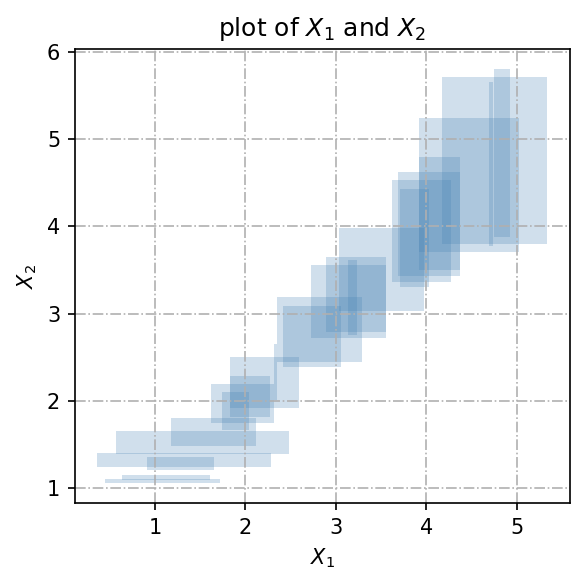

In [54]:
show3(mydatax, mydataxxx)

### 实际数据部分

In [11]:
file ="data/Iris"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a4', 'b4']
iris = pd.read_csv(f, sep='\s+', names=column_name)
a1 = iris['a1'].values
b1 = iris['b1'].values
a2 = iris['a2'].values
b2 = iris['b2'].values
a3 = iris['a3'].values
b3 = iris['b3'].values
a4 = iris['a4'].values
b4 = iris['b4'].values

iris_x1 = np.vstack((a1,b1)).T
iris_x2 = np.vstack((a2,b2)).T
iris_x3 = np.vstack((a3,b3)).T
iris_x4 = np.vstack((a4,b4)).T

# =================================================#
file ="data/mushroom"
f = open(file)
column_name = ['u', 'species', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'Edibility']
mushroom = pd.read_csv(f, sep='\s+', names=column_name)
a1 = mushroom['a1'].values
b1 = mushroom['b1'].values
a2 = mushroom['a2'].values
b2 = mushroom['b2'].values
a3 = mushroom['a3'].values
b3 = mushroom['b3'].values
mushroom_x1 = np.vstack((a1,b1)).T
mushroom_x2 = np.vstack((a2,b2)).T
mushroom_x3 = np.vstack((a3,b3)).T

# =================================================#
file ="data/blood pressure"
f = open(file)
column_name = ['u', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3']
blood = pd.read_csv(f, sep='\s+', names=column_name)
a1 = blood['a1'].values
b1 = blood['b1'].values
a2 = blood['a2'].values
b2 = blood['b2'].values
a3 = blood['a3'].values
b3 = blood['b3'].values
blood_x1 = np.vstack((a1,b1)).T
blood_x2 = np.vstack((a2,b2)).T
blood_x3 = np.vstack((a3,b3)).T

In [ ]:
realdata_method(mushroom_x1,mushroom_x2, path='data/reg_result/mushroom_12.csv')
realdata_method(mushroom_x1,mushroom_x3, path='data/reg_result/mushroom_13.csv')
realdata_method(mushroom_x2,mushroom_x3, path='data/reg_result/mushroom_23.csv')

realdata_method(blood_x1,blood_x2, path='data/reg_result/blood_12.csv')
realdata_method(blood_x1,blood_x3, path='data/reg_result/blood_13.csv')
realdata_method(blood_x2,blood_x3, path='data/reg_result/blood_23.csv')

realdata_method(iris_x1,iris_x2, path='data/reg_result/iris_12.csv')
realdata_method(iris_x1,iris_x3, path='data/reg_result/iris_13.csv')
realdata_method(iris_x2,iris_x3, path='data/reg_result/iris_23.csv')
realdata_method(iris_x1,iris_x4, path='data/reg_result/iris_14.csv')
realdata_method(iris_x2,iris_x4, path='data/reg_result/iris_24.csv')
realdata_method(iris_x3,iris_x4, path='data/reg_result/iris_34.csv')

##### 数据模拟实验2 更加线性的数据和特殊值

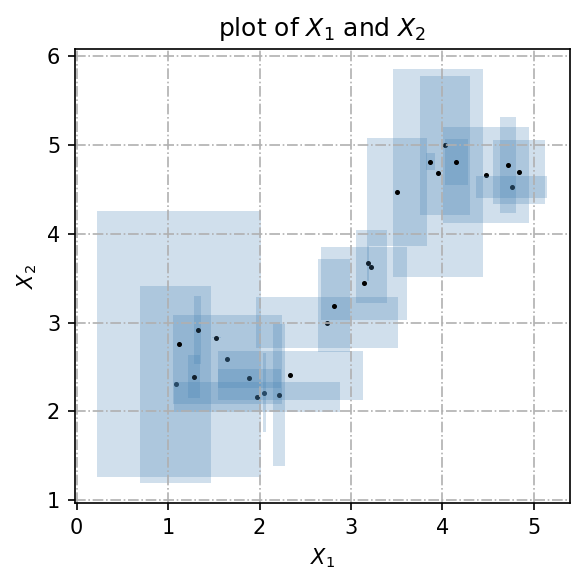

100%|██████████| 20/20 [00:04<00:00,  4.42it/s]


In [31]:
np.random.seed(0)
n = 100

x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.4, n))
y1_c =  np.linspace(2,5,n) + 0.6 * np.sin(x_c*2) + 0.2 * np.random.normal(0, 1, n)
y1_r =  x_r + 0.6 * np.sin(x_c*2) + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y1_u = y1_c + y1_r
y1_l = y1_c - y1_r

x = np.vstack((x_l, x_u)).T
y1 = np.vstack((y1_l, y1_u)).T
show3(x,y1, real=np.vstack((x_c, y1_c)).T)
realdata_method(x, y1, path='data/reg_result/data_x_y1.csv')

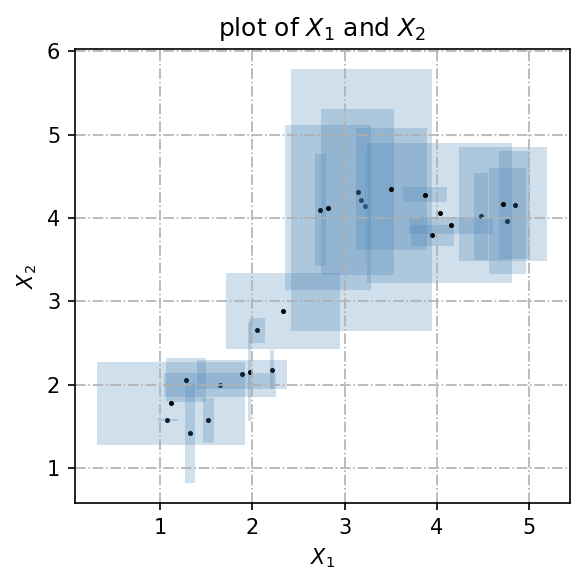

100%|██████████| 20/20 [00:04<00:00,  4.23it/s]


In [32]:
x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.4, n))
y2_c =  np.linspace(2,5,n) + 0.6 * np.cos(x_c*2) + 0.2 * np.random.normal(0, 1, n)
y2_r =  x_r + 0.6 * np.cos(x_c*2) + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y2_u = y2_c + y2_r
y2_l = y2_c - y2_r

x = np.vstack((x_l, x_u)).T
y2 = np.vstack((y2_l, y2_u)).T
show3(x,y2, real=np.vstack((x_c, y2_c)).T)
realdata_method(x, y2, path='data/reg_result/data_x_y2.csv')

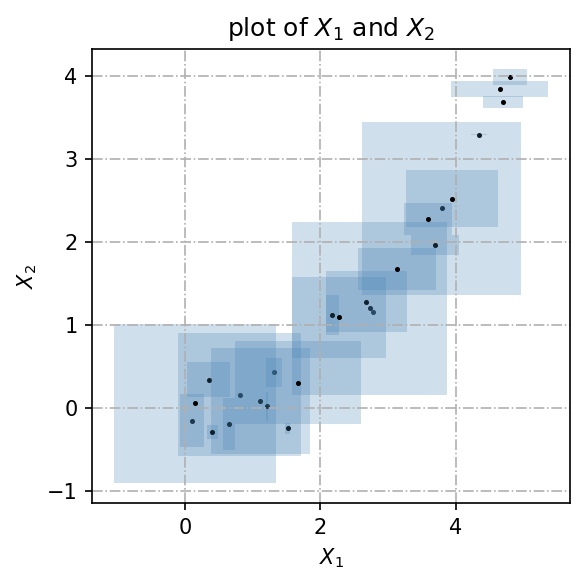

100%|██████████| 20/20 [00:04<00:00,  4.72it/s]


In [46]:
x_c = np.linspace(0,5,n)
x_r = abs(np.random.normal(0, 0.6, n))
y3_c =  np.linspace(0,2,n) + 0.2 * pow(x_c,2) - 0.5 * x_c + 0.2 * np.random.normal(0, 1, n)
y3_r =  x_r + 0.2 * pow(x_r,2) - 0.5 * x_r + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y3_u = y3_c + y3_r
y3_l = y3_c - y3_r

x = np.vstack((x_l, x_u)).T
y3 = np.vstack((y3_l, y3_u)).T
show3(x,y3, real=np.vstack((x_c, y3_c)).T)
realdata_method(x, y3, path='data/reg_result/data_x_y3.csv')

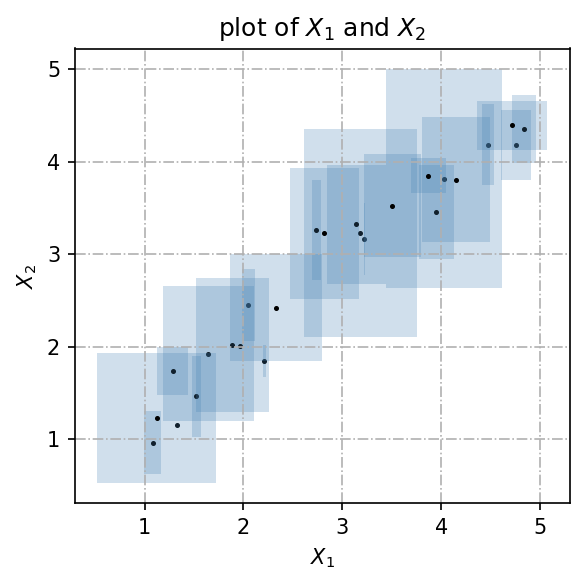

100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


In [51]:
x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.3, n))
y4_c =  np.linspace(1,3,n) + np.log(x_c) + 0.2 * np.random.normal(0, 1, n)
y4_r =  x_r + 0.3*np.log(x_c) + 0.2 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y4_u = y4_c + y4_r
y4_l = y4_c - y4_r

x = np.vstack((x_l, x_u)).T
y4 = np.vstack((y4_l, y4_u)).T
show3(x,y4, real=np.vstack((x_c, y4_c)).T)
realdata_method(x, y4, path='data/reg_result/data_x_y4.csv')

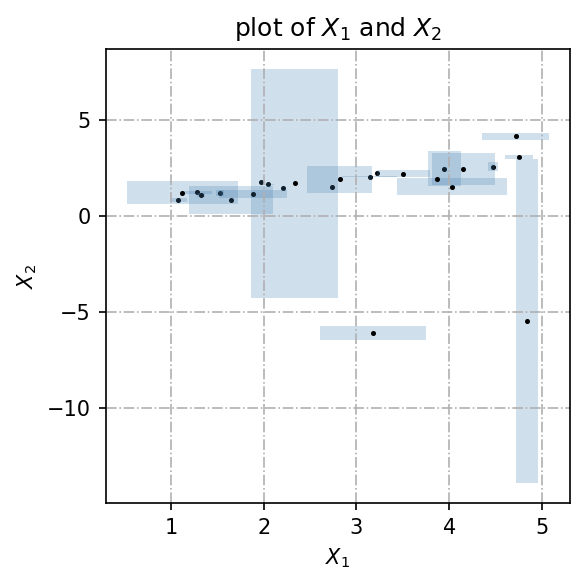

100%|██████████| 20/20 [00:05<00:00,  3.86it/s]


In [62]:
x_c = np.linspace(1,5,n)
x_r = abs(np.random.normal(0, 0.3, n))
y5_c =  np.linspace(1,3,n) + 0.1 * np.random.standard_t(df=1, size=n) + 0.1 * np.random.normal(0, 1, n)
y5_r =  x_r + 0.1 * np.random.standard_t(df=1, size=n) + 0.1 * np.random.normal(0, 1, n)

x_u = x_c + x_r
x_l = x_c - x_r
y5_u = y5_c + y5_r
y5_l = y5_c - y5_r

x = np.vstack((x_l, x_u)).T
y5 = np.vstack((y5_l, y5_u)).T
show3(x,y5, real=np.vstack((x_c, y5_c)).T)
realdata_method(x, y5, path='data/reg_result/data_x_y5.csv')